<a href="https://colab.research.google.com/github/projectsforstudents2022/Patient_Medicine_Classification/blob/main/Patient_Medicine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# Importing Dataset

data = pd.read_csv('/content/drive/MyDrive/Projects/Patient_Medicine_Classification/drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [77]:
# Checking Null

data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [78]:
# Making Dummies

dummy_variable_sex = pd.get_dummies(data["Sex"])
data = pd.concat([data, dummy_variable_sex], axis=1)
data.drop("Sex", axis = 1, inplace=True)

In [79]:
# Extract Target

y = data.iloc[:, -3].values
y

array(['DrugY', 'drugC', 'drugC', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugC', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'DrugY', 'drugX', 'drugA', 'drugC', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX',
       'DrugY', 'DrugY', 'drugX', 'drugB', 'drugX', 'DrugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'DrugY', 'drugB',
       'DrugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'DrugY',
       'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA', 'DrugY',
       'drugX', 'drugB', 'DrugY', 'drugA', 'drugX', 'DrugY', 'DrugY',
       'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'Dru

In [80]:
# Dropping Drug Column

dataset = data.drop("Drug", axis = 1, inplace=False)
dataset.head()

,Age,BP,Cholesterol,Na_to_K,F,M
0,23,HIGH,HIGH,25.355,1,0
1,47,LOW,HIGH,13.093,0,1
2,47,LOW,HIGH,10.114,0,1
3,28,NORMAL,HIGH,7.798,1,0
4,61,LOW,HIGH,18.043,1,0


In [81]:
# Converting Dataframe InTo Arrays

dataset_array = dataset.values
dataset_array

array([[23, 'HIGH', 'HIGH', 25.355, 1, 0],
       [47, 'LOW', 'HIGH', 13.093, 0, 1],
       [47, 'LOW', 'HIGH', 10.114, 0, 1],
       ...,
       [52, 'NORMAL', 'HIGH', 9.894, 0, 1],
       [23, 'NORMAL', 'NORMAL', 14.02, 0, 1],
       [40, 'LOW', 'NORMAL', 11.349, 1, 0]], dtype=object)

In [82]:
# LabelEncoding BP

from sklearn.preprocessing import LabelEncoder
le_BP = LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
dataset_array[:,1] = le_BP.transform(dataset_array[:,1])
dataset_array

array([[23, 0, 'HIGH', 25.355, 1, 0],
       [47, 1, 'HIGH', 13.093, 0, 1],
       [47, 1, 'HIGH', 10.114, 0, 1],
       ...,
       [52, 2, 'HIGH', 9.894, 0, 1],
       [23, 2, 'NORMAL', 14.02, 0, 1],
       [40, 1, 'NORMAL', 11.349, 1, 0]], dtype=object)

In [83]:
# LabelEncoding Cholestrol

from sklearn.preprocessing import LabelEncoder
le_Chole = LabelEncoder()
le_Chole.fit([ 'LOW', 'NORMAL', 'HIGH'])
dataset_array[:,2] = le_Chole.transform(dataset_array[:,2])
X = dataset_array


In [84]:
# Split Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [85]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
# Train Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [87]:
# Prediction

print(classifier.predict(sc.transform([[23, 1, 0, 7.297999999999999, 0, 1]])))

['drugC']


In [88]:
# Prediction (Test Case)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['drugC' 'drugC']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugA' 'drugA']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugB' 'drugB']
 ['drugC' 'drugC']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugC' 'drugC']
 ['drugA' 'drugA']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['drugA' 'drugA']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['drugA' 'drugA']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['drugX' 'drugX']
 ['DrugY' 'DrugY']
 ['DrugY' 'DrugY']
 ['drugA' 'drugA']
 ['DrugY' 'DrugY']]


In [89]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred, labels=['drugA','drugB','drugC','drugX','drugY'])
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred))

[[ 5  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0  0]]
Accuracy is 1.0


Confusion matrix, without normalization
[[ 5  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0  0]]


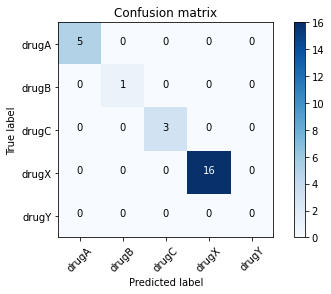

In [90]:
# Visulaisation

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plt.figure()
plot_confusion_matrix(cm, classes=['drugA','drugB','drugC','drugX','drugY'],normalize= False,  title='Confusion matrix')